In [ ]:
# Memuat library yang akan digunakan dalam project ini
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# **Data Loading**
Data berisi 16.340 pertandingan sepakbola dari 5 liga top Eropa (Inggris, Spanyol, Jerman, Italia, Prancis) serta Liga Champions dan Liga Europa dalam 7-10 musim terakhir, dari musim 2015-2016 hingga 2024-2025.

Di dalam setiap baris terdapat 53 kolom berisi statistik tiap pertandingan, dari tim yang bertanding beserta skornya, hingga detail seperti jumlah penguasaan bola, umpan, penyelamatan, dll.

Data diperoleh dari website statistik sepakbola [FBref](https://fbref.com/en/) dengan metode scraping.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dicoding ML Terapan/Pertama/matches.csv')
df.head()

,league,region,type,season,round,date,time,H_team_name,H_goals,A_goals,...,A_crosses,A_touches,A_tackles,A_interceptions,A_aerials_won,A_clearances,A_offsides,A_goal_kicks,A_throw_ins,A_long_balls
0,Fußball-Bundesliga,Germany,Club,2018-2019,Matchweek 1,2018-08-24,20:30,Bayern Munich,3,1,...,8,406,12,14,15,23,2,9,16,58
1,Fußball-Bundesliga,Germany,Club,2018-2019,Matchweek 1,2018-08-25,15:30,Hertha BSC,1,0,...,13,609,18,11,22,15,0,6,26,61
2,Fußball-Bundesliga,Germany,Club,2018-2019,Matchweek 1,2018-08-25,15:30,Wolfsburg,2,1,...,9,449,13,14,19,20,2,9,26,68
3,Fußball-Bundesliga,Germany,Club,2018-2019,Matchweek 1,2018-08-25,15:30,Freiburg,0,2,...,12,539,14,8,30,34,1,11,22,113
4,Fußball-Bundesliga,Germany,Club,2018-2019,Matchweek 1,2018-08-25,15:30,Werder Bremen,1,1,...,13,601,17,29,18,22,1,14,18,91


In [ ]:
df.shape

(16340, 53)

Penjelasan kolom-kolom dalam dataset

* league: Nama liga dari suatu pertandingan
* region: Wilayah asal liga
* type: Tipe tingkat pertandingan, dalam dataset ini semuanya berisi Club
* season: Musim digelarnya pertandingan
* round: Babak pertandingan
* date: Tanggal pertandingan
* time: Waktu pertandingan
* H_team_name: Nama tim tuan rumah
* H_goals: Jumlah gol tim tuan rumah
* A_goals: Jumlah gol tim tamu
* A_team_name: Nama tim tamu
* H_possession: Persentase penguasaan bola tim tuan rumah
* H_passes_completed: Jumlah umpan akurat tim tuan rumah
* H_passes_total: Total seluruh umpan tim tuan rumah
* H_shots_on_target: Jumlah tembakan tepat sasaran tim tuan rumah
* H_shots_total: Total seluruh tembakan tim tuan rumah
* H_saves: Jumlah penyelamatan tim tuan rumah
* H_yellow_cards: Jumlah kartu kuning tim tuan rumah
* H_red_cards: Jumlah kartu merah tim tuan rumah
* H_own_goals: Jumlah gol bunuh diri tim tuan rumah
* H_fouls: Jumlah pelanggaran tim tuan rumah
* H_corners: Jumlah tendangan sudut tim tuan rumah
* H_crosses: Jumlah umpan silang tim tuan rumah
* H_touches: Jumlah sentuhan bola tim tuan rumah
* H_tackles: Jumlah tekel tim tuan rumah
* H_interceptions: Jumlah potongan bola tim tuan rumah
* H_aerials_won: Jumlah menang duel udara tim tuan rumah
* H_clearances: Jumlah sapuan tim tuan rumah
* H_offsides: Jumlah offside tim tuan rumah
* H_goal_kicks: Jumlah tendangan gawang tim tuan rumah
* H_throw_ins: Jumlah lemparan ke dalam tim tuan rumah
* H_long_balls: Jumlah umpan panjang tim tuan rumah
* A_possession: Persentase penguasaan bola tim tamu
* A_passes_completed: Jumlah umpan akurat tim tamu
* A_passes_total: Total seluruh umpan tim tamu
* A_shots_on_target: Jumlah tembakan tepat sasaran tim tamu
* A_shots_total: Total seluruh tembakan tim tamu
* A_saves: Jumlah penyelamatan tim tamu
* A_yellow_cards: Jumlah kartu kuning tim tamu
* A_red_cards: Jumlah kartu merah tim tamu
* A_own_goals: Jumlah gol bunuh diri tim tamu
* A_fouls: Jumlah pelanggaran tim tamu
* A_corners: Jumlah tendangan sudut tim tamu
* A_crosses: Jumlah umpan silang tim tamu
* A_touches: Jumlah sentuhan bola tim tamu
* A_tackles: Jumlah tekel tim tamu
* A_interceptions: Jumlah potongan bola tim tamu
* A_aerials_won: Jumlah menang duel udara tim tamu
* A_clearances: Jumlah sapuan tim tamu
* A_offsides: Jumlah offside tim tamu
* A_goal_kicks: Jumlah tendangan gawang tim tamu
* A_throw_ins: Jumlah lemparan ke dalam tim tamu
* A_long_balls: Jumlah umpan panjang tim tamu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16340 entries, 0 to 16339
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   league              16340 non-null  object
 1   region              16340 non-null  object
 2   type                16340 non-null  object
 3   season              16340 non-null  object
 4   round               16340 non-null  object
 5   date                16340 non-null  object
 6   time                16340 non-null  object
 7   H_team_name         16340 non-null  object
 8   H_goals             16340 non-null  int64 
 9   A_goals             16340 non-null  int64 
 10  A_team_name         16340 non-null  object
 11  H_possession        16340 non-null  int64 
 12  H_passes_completed  16340 non-null  int64 
 13  H_passes_total      16340 non-null  int64 
 14  H_shots_on_target   16340 non-null  int64 
 15  H_shots_total       16340 non-null  int64 
 16  H_saves             16

Untuk melengkapi data tiap pertandingan yang sudah ada, dilakukan proses pembuatan kolom baru dari kolom yang sudah ada untuk menghasilkan data baru

* H_shots_percentage: Persentase tembakan akurat tim tuan rumah
* H_saves_percentage: Persentase penyelamatan tim tuan rumah
* H_passes_percentage: Persentase umpan akurat tim tuan rumah
* A_shots_percentage: Persentase tembakan akurat tim tamu
* A_saves_percentage: Persentase penyelamatan tim tamu
* A_passes_percentage: Persentase umpan akurat tim tamu

In [ ]:
# Membuat kolom persentase tembakan akurat
df['H_shots_percentage'] = round(df['H_shots_on_target'] / df['A_shots_total'] * 100)
df['A_shots_percentage'] = round(df['A_shots_on_target'] / df['A_shots_total'] * 100)

# Membuat kolom persentase penyelamatan
df['H_saves_percentage'] = round(df['H_saves'] / df['A_shots_on_target'] * 100)
df['A_saves_percentage'] = round(df['A_saves'] / df['H_shots_on_target'] * 100)

# Membuat kolom persentase umpan akurat
df['H_passes_percentage'] = round(df['H_passes_completed'] / df['H_passes_total'] * 100)
df['A_passes_percentage'] = round(df['A_passes_completed'] / df['A_passes_total'] * 100)

# **Exploratory Data Analysis**

**Data balance**

Memeriksa keseimbangan dataset berdasarkan pemenang pertandingan. Terlihat tim tuan rumah lebih banyak memenangkan pertandingan.

<Axes: xlabel='winner'>

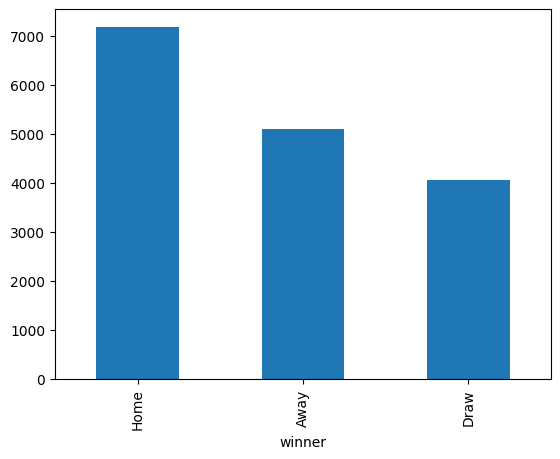

In [ ]:
def get_winner(row):
  h = row['H_goals']
  a = row['A_goals']

  if h > a:
    return 'Home'
  elif h < a:
    return 'Away'
  else:
    return 'Draw'

df['winner'] = df.apply(get_winner, axis=1)
count = df['winner'].value_counts()
count.plot(kind='bar')

**Missing value**

Pengecekan data kosong menunjukkan terdapat data kosong, namun hanya pada kolom persentase. Ini bisa  terjadi karena kesalahan pembagian. Sehingga kekosongan ini bisa diisi dengan angka 0.

Kesalahan pembagian juga mengakibatkan adanya nilai tak hingga (inf). Untuk mengatasi hal ini juga akan dilakukan cara yang sama, yaitu menggantinya dengan 0.

In [ ]:
missings = [np.inf, -np.inf, np.nan, None]
df_null = df.isin(missings).sum()
df_null[df_null > 0]

,0
H_shots_percentage,12
A_shots_percentage,12
H_saves_percentage,690
A_saves_percentage,354


In [ ]:
# Mengisi data kosong dengan 0
df.replace(missings, 0, inplace=True)

**Duplicate**

Selain itu juga dilakukan pemeriksaan data duplikat untuk memastikan setiap baris unik. Pemeriksaan menunjukkan tidak ada data duplikat dalam dataset

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,H_goals,A_goals,H_possession,H_passes_completed,H_passes_total,H_shots_on_target,H_shots_total,H_saves,H_yellow_cards,H_red_cards,...,A_offsides,A_goal_kicks,A_throw_ins,A_long_balls,H_shots_percentage,A_shots_percentage,H_saves_percentage,A_saves_percentage,H_passes_percentage,A_passes_percentage
count,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,...,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000
mean,1.558996,1.260526,51.203244,402.695838,505.572583,4.569890,13.672215,2.628886,1.980233,0.087699,...,1.773317,8.322460,19.912179,67.585679,55.601163,33.736108,66.865545,67.910771,78.252570,77.424480
std,1.316682,1.184698,11.252517,131.957882,130.185483,2.537113,5.435084,1.845451,1.441616,0.301711,...,1.564657,3.491677,6.095548,14.758254,65.717614,16.722151,30.892596,27.435192,6.987204,7.181283
min,0.000000,0.000000,18.000000,84.000000,183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,19.000000,0.000000,0.000000,0.000000,0.000000,45.000000,41.000000
25%,1.000000,0.000000,43.000000,304.000000,411.000000,3.000000,10.000000,1.000000,1.000000,0.000000,...,1.000000,6.000000,16.000000,57.000000,22.000000,22.000000,50.000000,50.000000,74.000000,73.000000
50%,1.000000,1.000000,51.000000,390.000000,495.000000,4.000000,13.000000,2.000000,2.000000,0.000000,...,1.000000,8.000000,19.000000,67.000000,40.000000,33.000000,70.000000,71.000000,79.000000,78.000000
75%,2.000000,2.000000,59.000000,487.000000,588.000000,6.000000,17.000000,4.000000,3.000000,0.000000,...,3.000000,10.000000,24.000000,77.000000,67.000000,44.000000,100.000000,92.000000,83.000000,83.000000
max,9.000000,9.000000,84.000000,1001.000000,1092.000000,20.000000,47.000000,14.000000,11.000000,3.000000,...,14.000000,26.000000,47.000000,135.000000,1500.000000,100.000000,100.000000,100.000000,94.000000,93.000000


**Outlier**

Penanganan outlier atau data yang jauh dari cakupan umum menggunakan Inter Quartile Range (IQR) Method. Setelah menghapus data outlier, data yang tersisa menjadi 7.873 baris.

In [ ]:
# Memilih data bertipe numerik dari dataframe
num_features = df.select_dtypes(exclude=[object]).columns

# Membuat dataframe baru yang hanya berisi data numerik
df_num = df[num_features]
df_num.head()

,H_goals,A_goals,H_possession,H_passes_completed,H_passes_total,H_shots_on_target,H_shots_total,H_saves,H_yellow_cards,H_red_cards,...,A_offsides,A_goal_kicks,A_throw_ins,A_long_balls,H_shots_percentage,A_shots_percentage,H_saves_percentage,A_saves_percentage,H_passes_percentage,A_passes_percentage
0,3,1,67,519,621,4,15,4,1,0,...,2,9,16,58,50.0,62.0,80.0,50.0,84.0,73.0
1,1,0,49,376,488,3,10,2,2,0,...,0,6,26,61,30.0,20.0,100.0,67.0,77.0,77.0
2,2,1,58,355,477,7,10,3,5,0,...,2,9,26,68,88.0,38.0,100.0,71.0,74.0,66.0
3,0,2,53,344,472,6,22,0,1,0,...,1,11,22,113,60.0,20.0,0.0,100.0,73.0,71.0
4,1,1,55,487,597,3,14,3,0,0,...,1,14,18,91,23.0,31.0,75.0,67.0,82.0,79.0


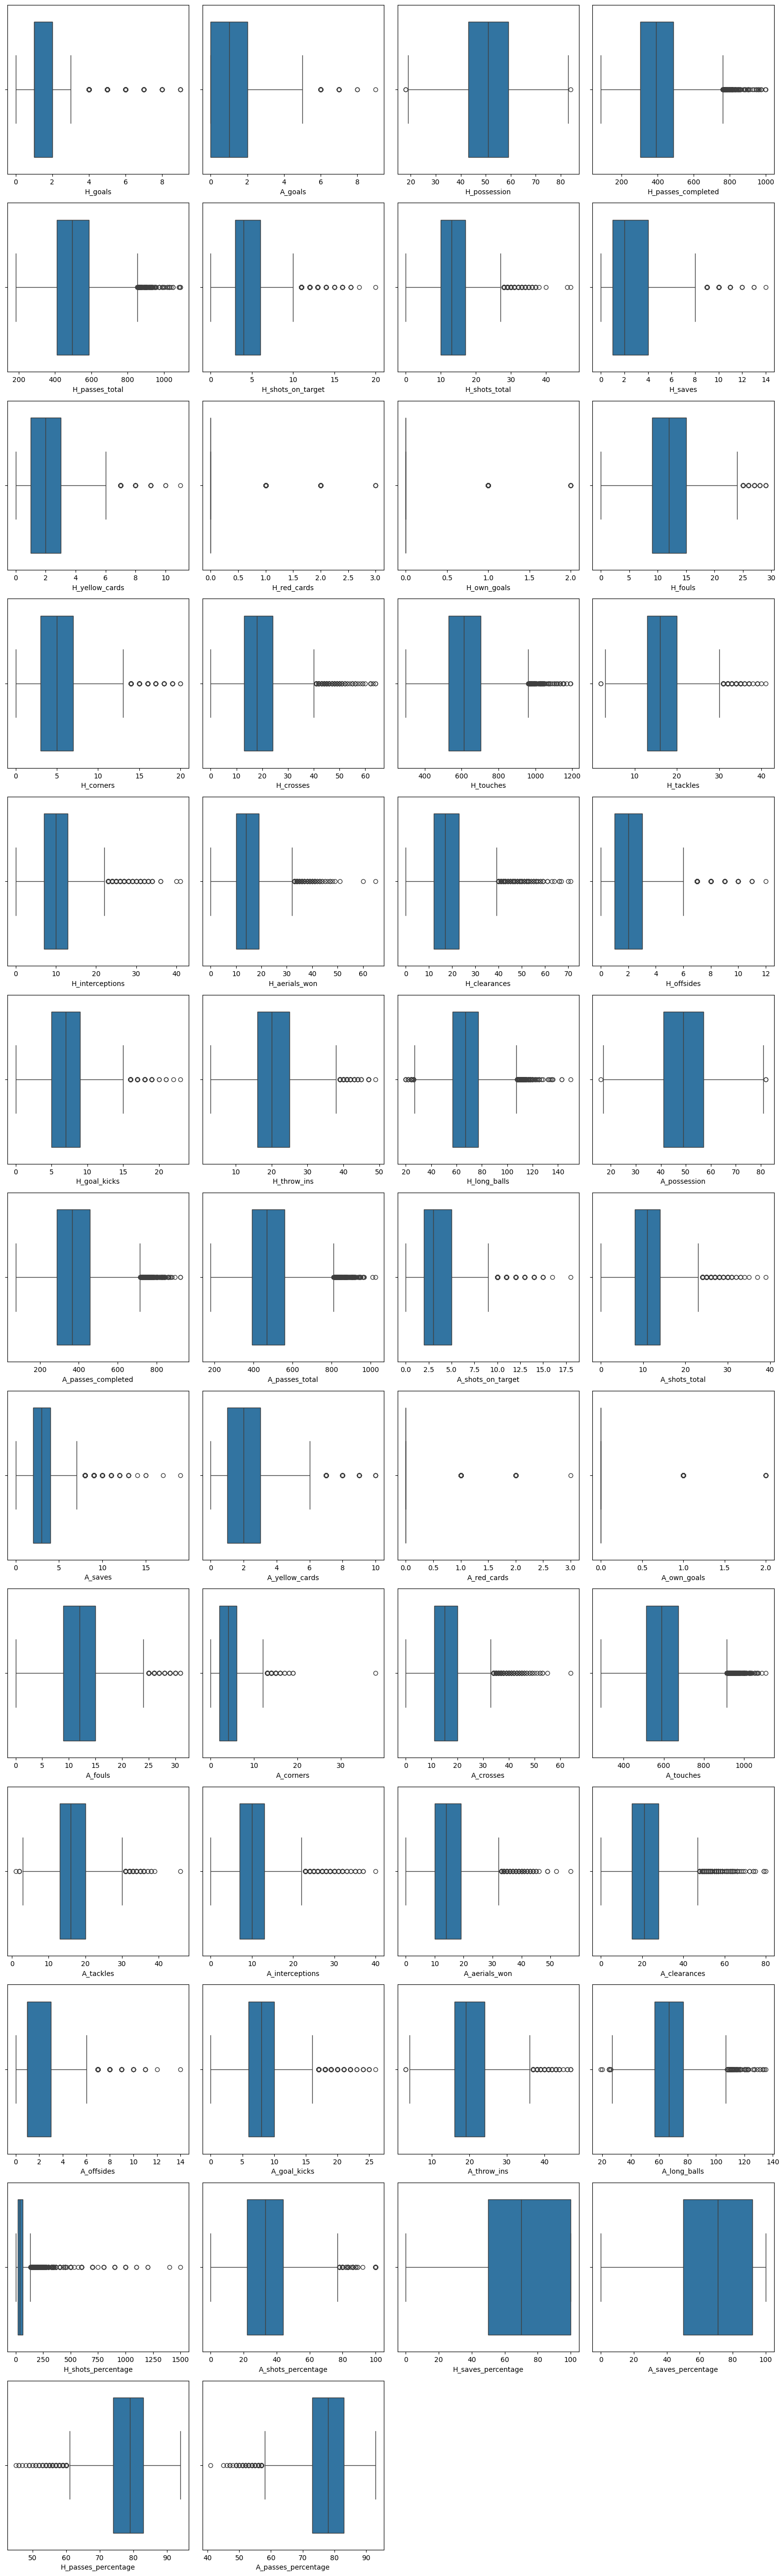

In [ ]:
# Menampilkan box plot tiap kolom untuk melihat adanya outlier
plt.figure(figsize=(16, len(num_features) * 4))
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features), 4, i)
    sns.boxplot(x=df_num[feature])

plt.tight_layout()
plt.show()

In [ ]:
# Menghapus baris di luar jangkauan kuartil
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

df_clean = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(7873, 50)

**Univariate Analysis**

* Sebagian besar dari diagram menunjukkan distribusi normal, yang terlihat dari histogram berbentuk lonceng (bell curve).
* Seluruh data kartu merah dan gol bunuh diri untuk kedua tim bernilai 0. Menunjukkan adanya kartu merah atau gol bunuh diri pada pertandingan jarang terjadi, sehingga data pertandingan yang terdapat kartu merah atau gol bunuh diri adalah outlier.
* Nilai "result" yang bernilai positif agak lebih banyak dari yang bernilai negatif, menunjukkan lebih banyak tim tuan rumah yang menang daripada tim tamu. Ini sejalan dengan anggapan bermain di kandang lebih menguntungkan.

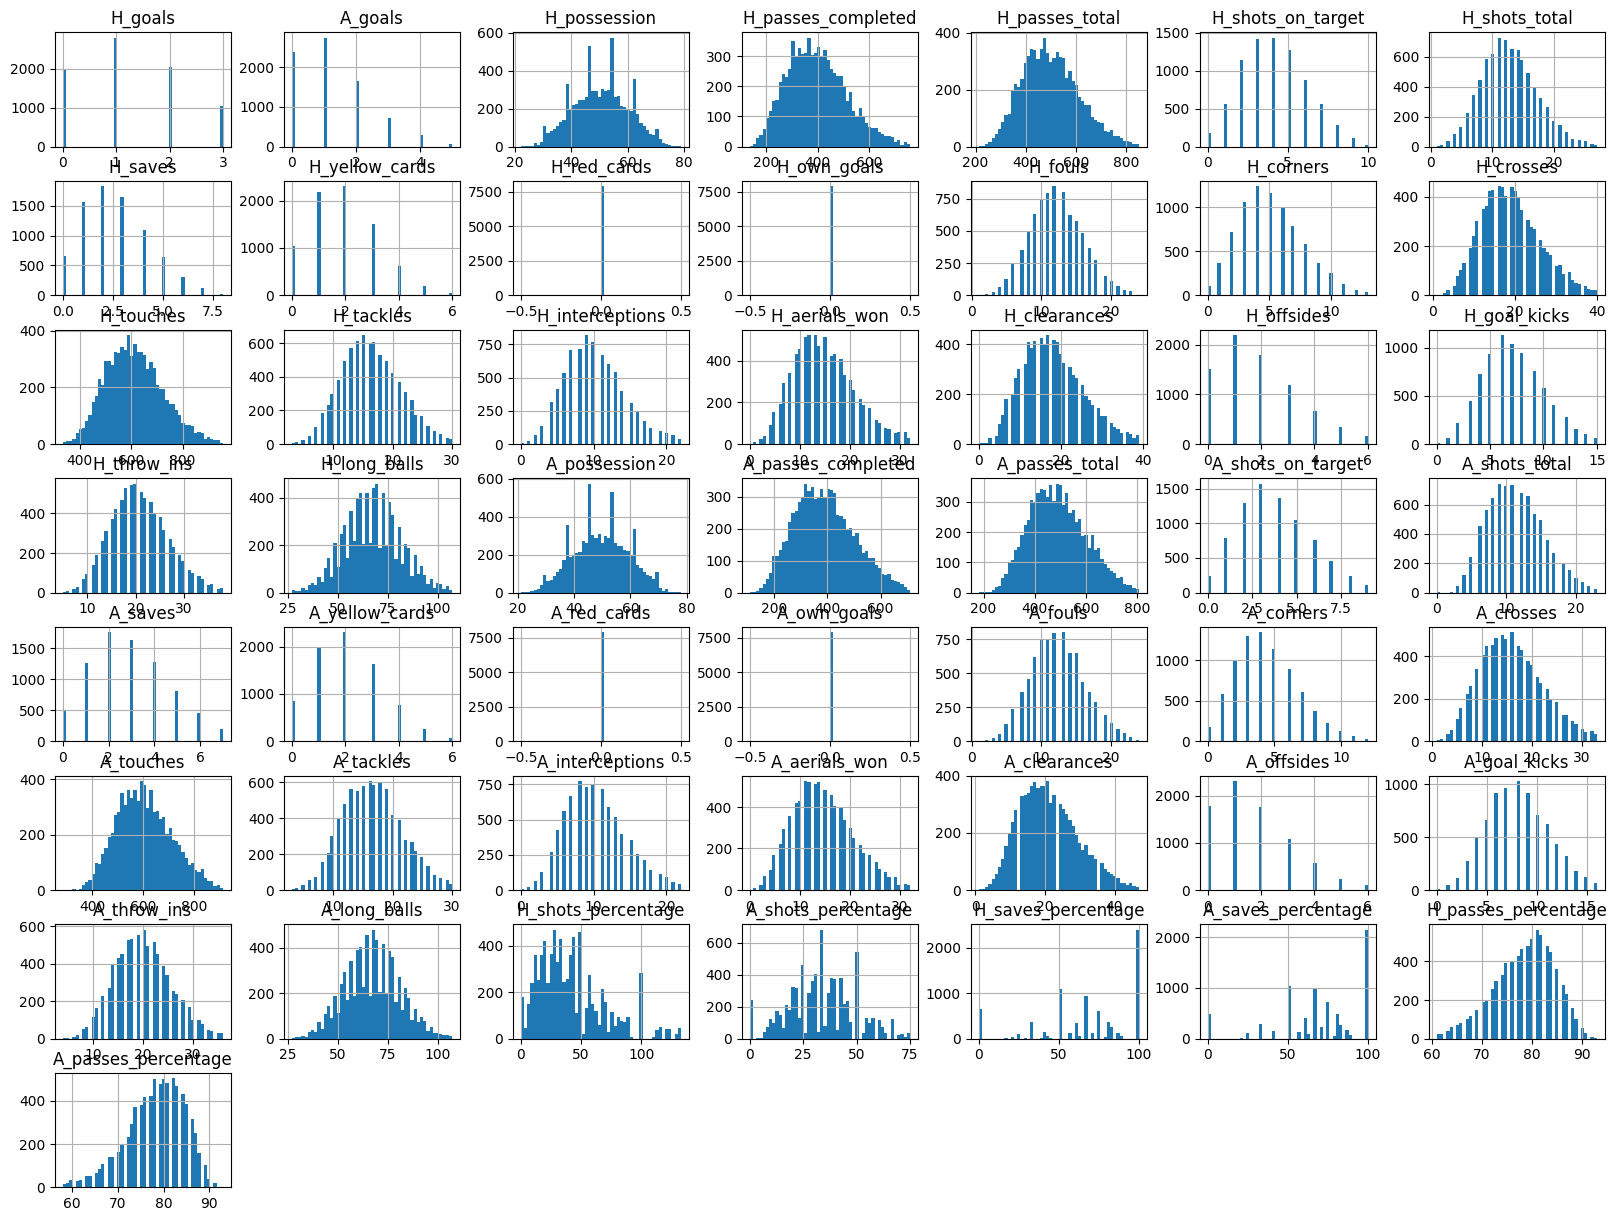

In [ ]:
df_clean.hist(bins=50, figsize=(20,15))
plt.show()

**Multivariate Analysis**

Untuk mengamati hubungan variabel dengan fitur target "result", digunakan analisis melalui pair plot dan correlation matrix.

* Analisis pair plot menunjukkan beberapa variabel seperti "H_shots_on_target" dan "A_shots_on_target" memiliki korelasi yang ditandai dengan adanya bentuk grafik yang berbentuk agak naik atau turun.
* Setelah menggunakan correlation matrix, dilakukan filtering untuk variabel yang memiliki skor lebih dari 0.1 atau kurang dari -0.1, hasilnya terdapat 18 variabel yang dapat digunakan untuk membangun model.

<Axes: >

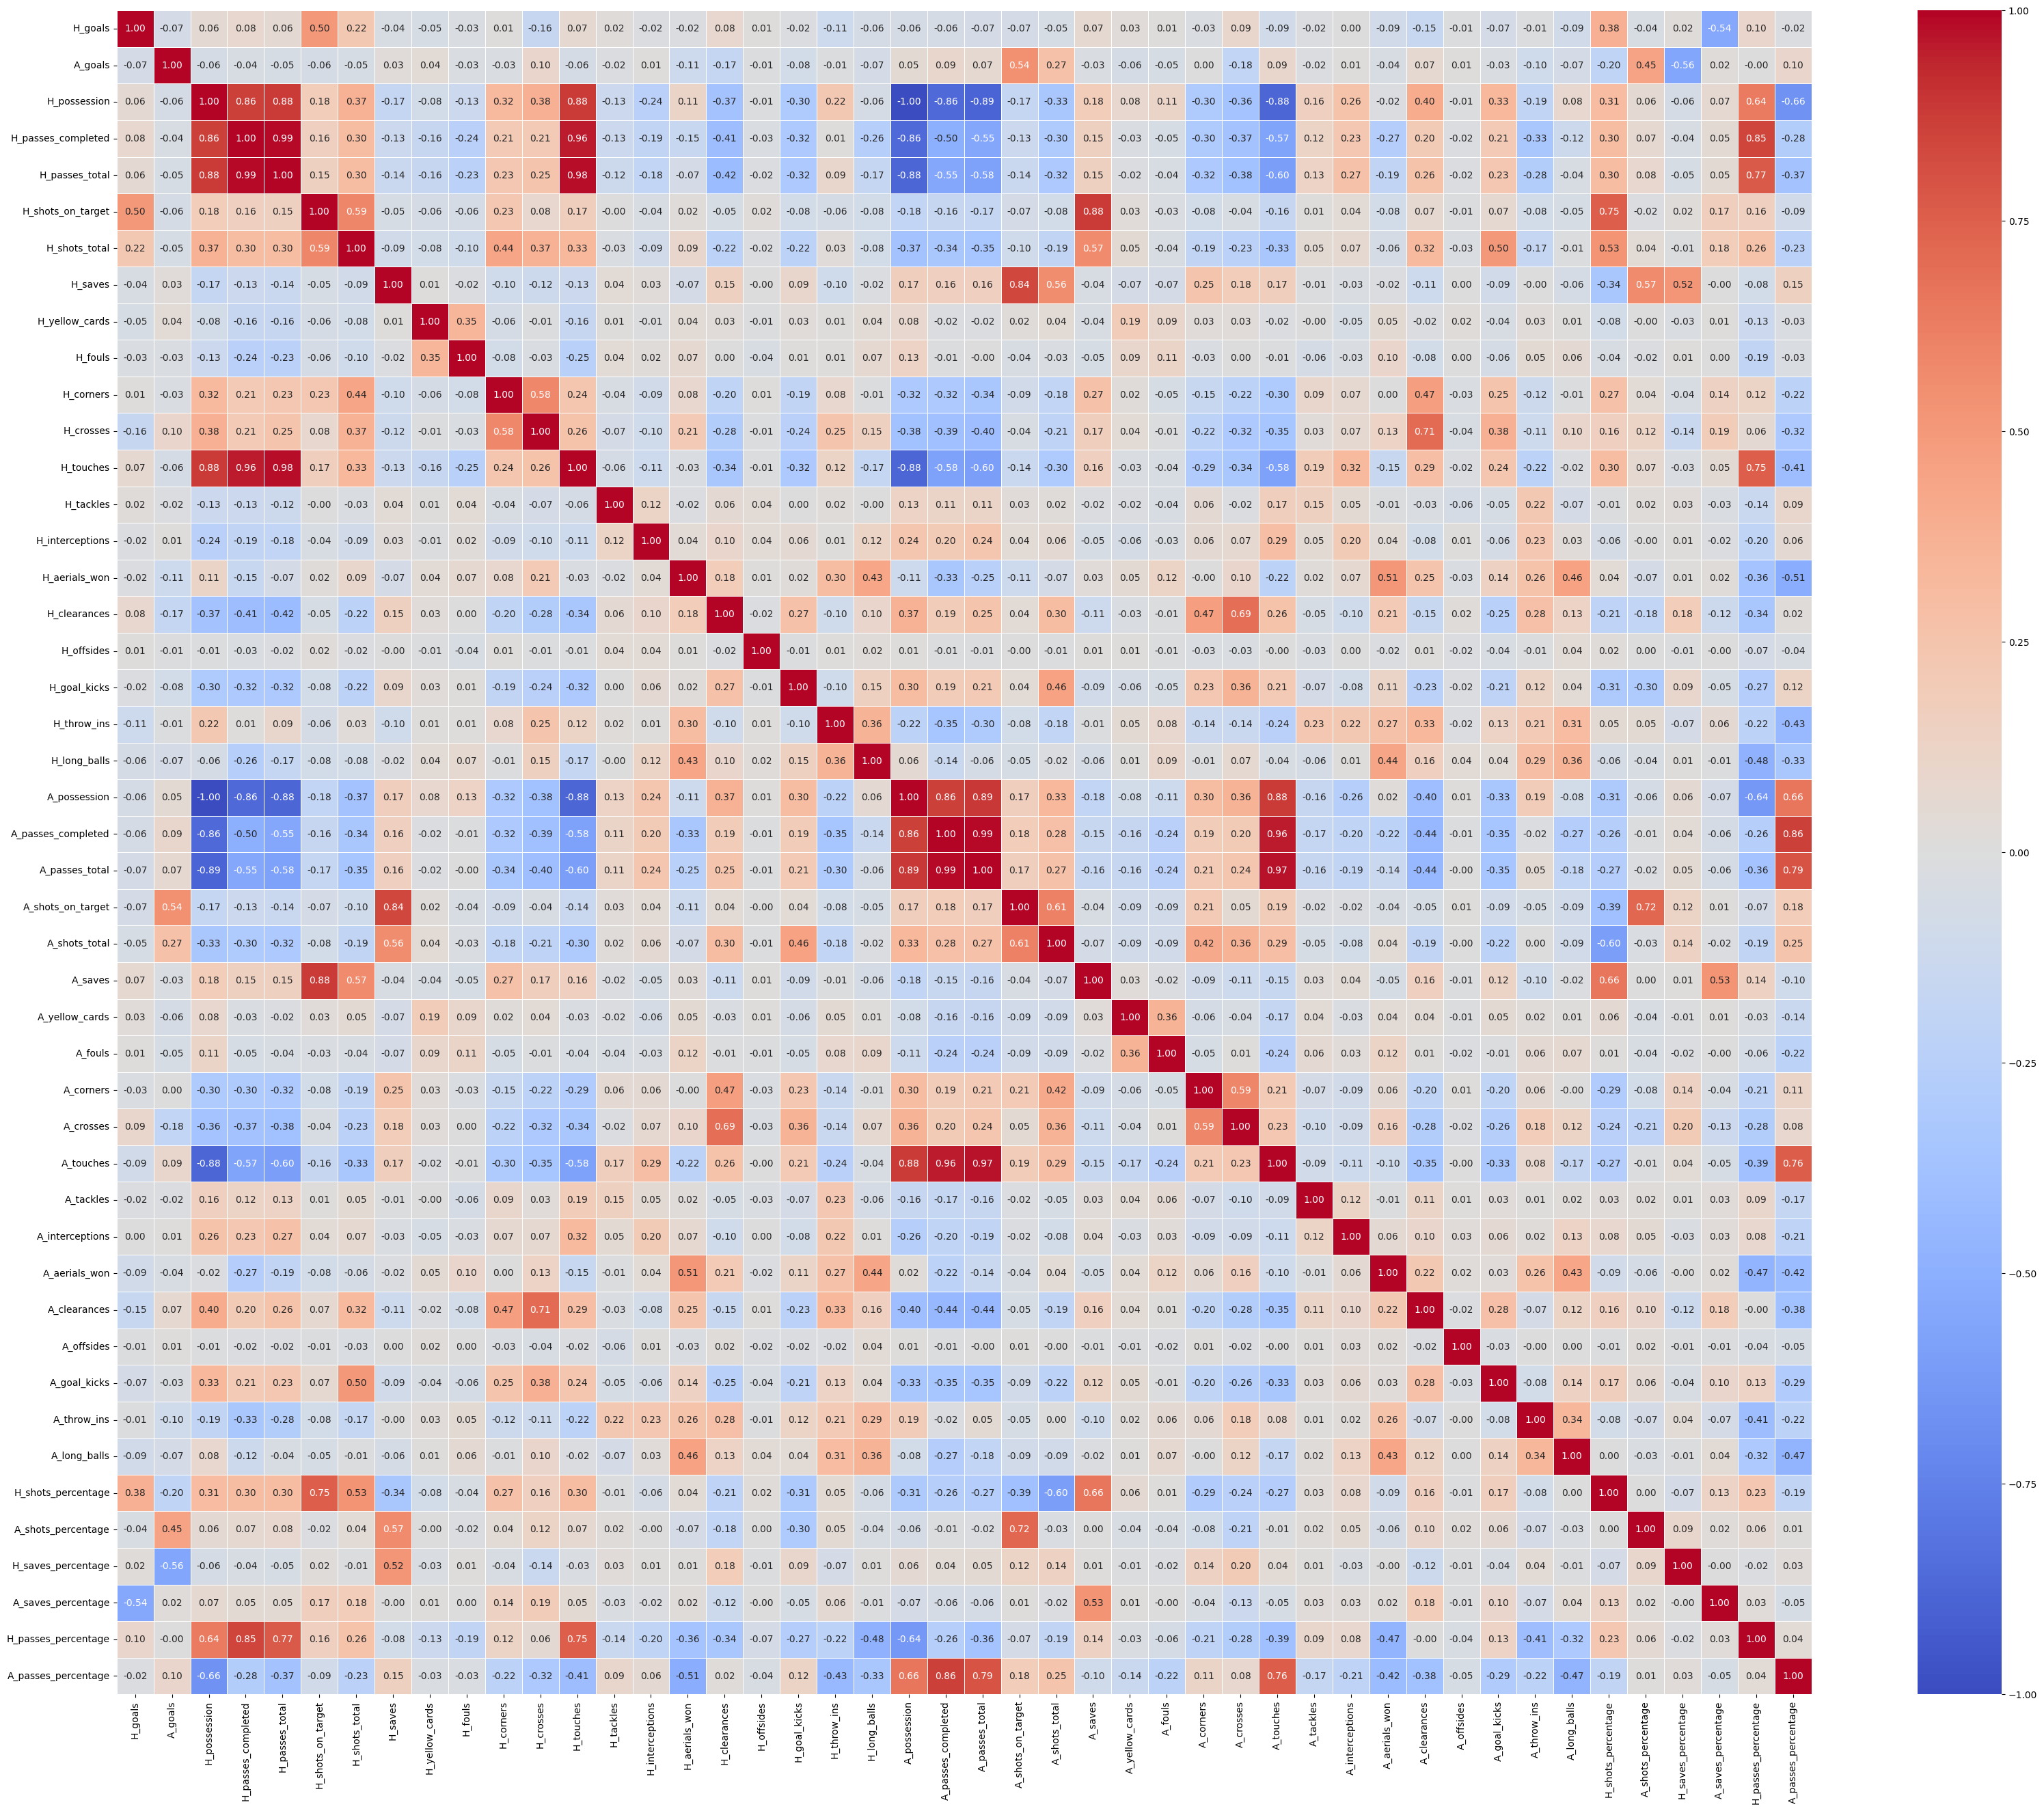

In [ ]:
df_clean = df_clean.drop(columns=['H_red_cards', 'H_own_goals', 'A_red_cards', 'A_own_goals'])
plt.figure(figsize=(40, 32))
correlation_matrix = df_clean.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=0.5, annot=True, fmt='.2f')

In [ ]:
threshold = 0.1
col = 'goal_diff'

h_corr = correlation_matrix.loc[abs(correlation_matrix['H_goals']) >= threshold]
a_corr = correlation_matrix.loc[abs(correlation_matrix['A_goals']) >= threshold]

corr_cols = pd.concat([h_corr['H_goals'], a_corr['A_goals']])
corr_cols

,0
H_goals,1.00
H_shots_on_target,0.50
H_shots_total,0.22
H_crosses,-0.16
H_throw_ins,-0.11
A_clearances,-0.15
H_shots_percentage,0.38
A_saves_percentage,-0.54
H_passes_percentage,0.10
A_goals,1.00


In [ ]:
cols = list(set(corr_cols.index))
df_prep = df_clean[cols].copy()
df_prep.head()

,H_aerials_won,H_clearances,A_clearances,A_shots_percentage,A_shots_total,A_throw_ins,H_goals,H_crosses,H_shots_on_target,H_shots_percentage,H_saves_percentage,A_goals,A_passes_percentage,A_shots_on_target,H_throw_ins,A_crosses,H_shots_total,A_saves_percentage,H_passes_percentage
0,9,12,23,62.0,8,16,3,19,4,50.0,80.0,1,73.0,5,28,8,15,50.0,84.0
1,22,22,15,20.0,10,26,1,21,3,30.0,100.0,0,77.0,2,18,13,10,67.0,77.0
5,25,38,25,43.0,14,21,1,19,5,36.0,67.0,2,74.0,6,23,25,8,80.0,76.0
6,16,27,22,21.0,14,19,2,18,5,36.0,100.0,0,84.0,3,18,20,16,80.0,83.0
7,26,19,31,25.0,12,32,1,23,3,25.0,100.0,0,74.0,3,22,17,10,67.0,72.0


# **Data Preparation**

Dalam bagian ini dilakukan langkah-langkah berikut
* Standardisasi, untuk membuat data fitur mendekati distribusi normal, dapat dilihat dari simpangan baku (std) yang mendekati 1 dan rata-rata (mean) mendekati 0.
* Pembagian data training dan testing, dengan rasio 80% data digunakan untuk training dan 20% untuk testing.

In [ ]:
# Standardisasi fitur
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_prep)
df_scaled = pd.DataFrame(scaled_data, columns=df_prep.columns)

In [ ]:
# Pembagian data training dan testing
col_target = ['H_goals', 'A_goals']
X = df_scaled.drop(col_target, axis=1)
y = df_prep.loc[:, col_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 128)

print(f'Total sampel training: {len(X_train)}')
print(f'Total sampel testing: {len(X_test)}')

Total sampel training: 7085
Total sampel testing: 788


In [ ]:
X_train.describe().round(4)

,H_aerials_won,H_clearances,A_clearances,A_shots_percentage,A_shots_total,A_throw_ins,H_crosses,H_shots_on_target,H_shots_percentage,H_saves_percentage,A_passes_percentage,A_shots_on_target,H_throw_ins,A_crosses,H_shots_total,A_saves_percentage,H_passes_percentage
count,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000,7085.0000
mean,-0.0013,0.0010,0.0008,0.0069,-0.0035,0.0020,0.0008,-0.0090,-0.0059,0.0080,-0.0021,0.0031,0.0008,-0.0004,-0.0061,-0.0016,0.0028
std,1.0019,1.0027,1.0038,0.9977,0.9976,0.9999,0.9998,1.0001,0.9989,0.9942,1.0007,0.9975,0.9996,1.0017,0.9983,1.0034,1.0007
min,-2.4462,-2.4641,-2.3915,-2.1851,-2.8266,-2.8653,-2.5336,-2.0130,-1.5110,-2.2756,-3.2269,-1.8546,-2.6767,-2.4172,-2.6856,-2.5594,-2.9168
25%,-0.7966,-0.6944,-0.7285,-0.6712,-0.8325,-0.7151,-0.7050,-0.5276,-0.7490,-0.5969,-0.6758,-0.8648,-0.6407,-0.8007,-0.6445,-0.7159,-0.5790
50%,-0.1367,-0.1499,-0.1346,-0.0130,-0.0847,0.0016,-0.1423,-0.0325,-0.2047,0.1081,0.1214,0.1251,-0.1317,-0.1541,-0.1910,0.0584,0.0889
75%,0.6881,0.6669,0.5781,0.6451,0.6632,0.7184,0.7017,0.4627,0.5210,1.0818,0.7592,0.6200,0.7167,0.6541,0.7162,1.1277,0.7568
max,2.8326,2.8451,3.0725,2.7513,2.9066,2.8686,2.9523,2.9383,3.3150,1.0818,2.3537,2.5997,2.9224,2.7555,3.2109,1.1277,2.4266


# **Model Development**

Untuk pelatihan model akan menggunakan fungsi Lazy Regressor yang bertujuan untuk membuat banyak model regresi dari berbagai macam algoritma. Setelah pelatihan akan dipilih 5 model terbaik.

In [ ]:
models = pd.DataFrame(
    index=['train_mse', 'test_mse'],
    columns=['LR', 'RF', 'SVR', 'MLP']
)

In [ ]:
lin = LinearRegression()
lin.fit(X_train, y_train)

param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}
rf = GridSearchCV(
  RandomForestRegressor(n_estimators=100, random_state=42),
  param_grid=param_rf,
  verbose=0
)
rf.fit(X_train, y_train)

param_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}
svr = GridSearchCV(SVR(kernel='rbf'), param_grid=param_svr, verbose=0)
multi_svr = MultiOutputRegressor(svr)
multi_svr.fit(X_train,y_train)

param_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}
mlp = GridSearchCV(MLPRegressor(), param_grid=param_mlp, verbose=0)
multi_mlp = MultiOutputRegressor(mlp)
multi_mlp.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS R

MultiOutputRegressor(estimator=GridSearchCV(estimator=MLPRegressor(),
                                            param_grid={'activation': ['tanh',
                                                                       'relu'],
                                                        'hidden_layer_sizes': [(50,
                                                                                50,
                                                                                50),
                                                                               (50,
                                                                                100,
                                                                                50),
                                                                               (100,)],
                                                        'solver': ['lbfgs',
                                                                   'sgd',
                                                                   'adam']}))

# **Model Evaluation**

Menghitung MSE tiap model pada data training dan testing untuk membandingkan performa model-model ini pada saat training dan testing.

Uji coba perhitungan hasil juga akan dilalukan menggunakan 20 data testing untuk melihat seberapa akurat hasil prediksi model-model terpilih dengan data sebenarnya. Dalam uji coba ditunjukkan hasil prediksi "result" beserta skor pertandingan berdasarkan inverse dari PCA.

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=models.columns)
model_dict = {'LR': lin, 'RF': rf, 'SVR': multi_svr, 'MLP': multi_mlp}

for name, model in model_dict.items():
    mse_train = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse_test = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
    mse.loc[name, 'train'] = round(np.sqrt(mse_train), 3)
    mse.loc[name, 'test'] = round(np.sqrt(mse_test), 3)

mse

,train,test
LR,0.591,0.584
RF,0.23,0.372
SVR,0.343,0.345
MLP,0.33,0.355


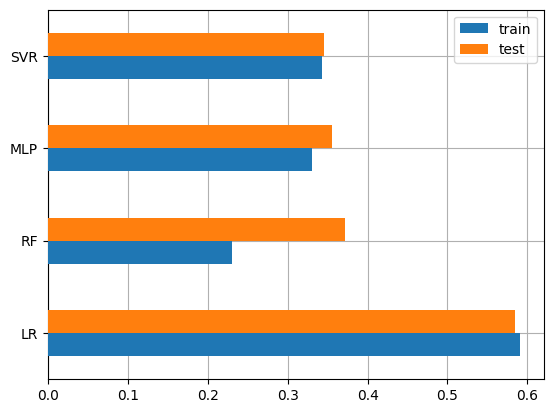

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
# Menguji model dengan 20 data testing
inf_x = X_test.iloc[:20].copy()
inf_y = y_test[:20]
pred_dict = {'y_true': [f'{y["H_goals"]}-{y["A_goals"]}' for i,y in inf_y.iterrows()]}

for name, model in model_dict.items():
    y_hat = model.predict(inf_x)
    y_inv = [f'{round(y[0], 2)}, {round(y[1], 2)} ({int(round(y[0]))}-{int(round(y[1]))})' for y in y_hat]
    pred_dict[name] = y_inv

pred = pd.DataFrame(pred_dict)
pred.index = inf_y.index
pred

,y_true,LR,RF,SVR,MLP
7187,1-0,"1.07, 0.63 (1-1)","1.11, 0.07 (1-0)","1.1, 0.0 (1-0)","1.16, 0.0 (1-0)"
12905,1-1,"0.8, 1.03 (1-1)","0.28, 1.19 (0-1)","0.04, 1.06 (0-1)","0.07, 1.04 (0-1)"
5898,1-1,"1.77, 1.81 (2-2)","1.18, 1.31 (1-1)","1.07, 1.17 (1-1)","1.06, 1.17 (1-1)"
7389,3-1,"2.19, 1.1 (2-1)","2.95, 1.47 (3-1)","2.96, 1.11 (3-1)","2.97, 1.05 (3-1)"
10089,2-2,"1.0, 1.89 (1-2)","1.08, 2.02 (1-2)","1.1, 2.1 (1-2)","1.22, 2.2 (1-2)"
14941,3-1,"1.8, 1.36 (2-1)","2.14, 1.07 (2-1)","2.08, 1.08 (2-1)","2.14, 1.05 (2-1)"
7703,2-0,"2.35, -0.68 (2--1)","2.4, 0.05 (2-0)","2.02, 0.03 (2-0)","2.27, -0.06 (2-0)"
4432,0-2,"0.28, 1.57 (0-2)","0.24, 2.08 (0-2)","0.1, 2.06 (0-2)","0.36, 2.02 (0-2)"
15757,0-1,"0.69, -0.37 (1-0)","0.19, 0.04 (0-0)","0.11, 0.06 (0-0)","0.44, 0.07 (0-0)"
15028,2-2,"1.72, 2.26 (2-2)","2.28, 2.03 (2-2)","2.0, 2.02 (2-2)","2.24, 1.93 (2-2)"
